In [293]:
from datetime import datetime, timedelta
import statsmodels.api as sm
import pandas as pd
import numpy as np
from dateutil.relativedelta import relativedelta
from scipy.stats import spearmanr
import os
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pickle
import matplotlib.pyplot as plt
import time
import warnings
import os
warnings.filterwarnings('ignore', category=FutureWarning)
root = '/Users/ella/test/'
period = 20
idx = '000300.XSHG'

In [284]:
returns_df = pd.read_csv(os.path.join(root, 'returns_df'),index_col=0)
price = pd.read_csv(os.path.join(root, 'get_price'),index_col=0)

In [237]:
def func(result, period=20):
    returns_df = pd.read_csv(os.path.join(root, 'returns_df'),index_col=0)
    price = pd.read_csv(os.path.join(root, 'get_price'),index_col=0)
    layer_ind = result.apply(lambda x: pd.qcut(x.rank(method="first"), q=10, labels=[10,9,8,7,6,5,4,3,2,1]), axis=1)
    r = []
    dates = pd.Series(result.index)
    for i in range(0, len(dates), period):
        date = dates[0]
        dates = dates.shift(-period)
        end_date = dates[0]
        if end_date == None:
            break
        period_daily_return = (price.loc[date: end_date].diff()/price.loc[date])[1:]
        all_average_returns_df = pd.concat([period_daily_return])#.cumsum()
        period_label = layer_ind.loc[date: end_date].iloc[0]
        group_1_returns = all_average_returns_df.loc[date: end_date][period_label[period_label == 1].index]
        group_1_returns = group_1_returns.mean(axis=1).to_frame(name=1)
        group_2_returns = all_average_returns_df.loc[date: end_date][period_label[period_label == 2].index]
        group_2_returns = group_2_returns.mean(axis=1).to_frame(name=2)
        group_3_returns = all_average_returns_df.loc[date: end_date][period_label[period_label == 3].index]
        group_3_returns = group_3_returns.mean(axis=1).to_frame(name=3)
        group_4_returns = all_average_returns_df.loc[date: end_date][period_label[period_label == 4].index]
        group_4_returns = group_4_returns.mean(axis=1).to_frame(name=4)
        group_5_returns = all_average_returns_df.loc[date: end_date][period_label[period_label == 5].index]
        group_5_returns = group_5_returns.mean(axis=1).to_frame(name=5)
        group_6_returns = all_average_returns_df.loc[date: end_date][period_label[period_label == 6].index]
        group_6_returns = group_6_returns.mean(axis=1).to_frame(name=6)
        group_7_returns = all_average_returns_df.loc[date: end_date][period_label[period_label == 7].index]
        group_7_returns = group_7_returns.mean(axis=1).to_frame(name=7)
        group_8_returns = all_average_returns_df.loc[date: end_date][period_label[period_label == 8].index]
        group_8_returns = group_8_returns.mean(axis=1).to_frame(name=8)
        group_9_returns = all_average_returns_df.loc[date: end_date][period_label[period_label == 9].index]
        group_9_returns = group_9_returns.mean(axis=1).to_frame(name=9)
        group_10_returns = all_average_returns_df.loc[date: end_date][period_label[period_label == 10].index]
        group_10_returns = group_10_returns.mean(axis=1).to_frame(name=10)
        r.append(pd.concat([group_1_returns, group_2_returns, group_3_returns, group_4_returns, group_5_returns, group_6_returns, group_7_returns, group_8_returns, group_9_returns, group_10_returns], axis=1))
    all_average_returns_df = pd.concat(r)#.cumsum()
    


 
    all_average_returns_df.index = pd.to_datetime(all_average_returns_df.index)
    plt.figure(figsize=(40, 6))
    all_average_returns_df = all_average_returns_df[all_average_returns_df.index <= '2024-01-01']
    df = (1 + all_average_returns_df).cumprod()
    # 为每个列标签画出折线图
    for column in df.columns:
        plt.plot(df.index, df[column], label=column, alpha=0.4)

    plt.xlabel('Date')
    plt.ylabel('Group Return')
    plt.title('Line Graph for Each Label')

    # 设置x轴标签的格式
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=12))  # 每隔一个月显示一次
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)  # 旋转x轴标签以便更好的显示
    plt.savefig('line_graph.png')
    plt.show()


    idx_long = all_average_returns_df.cumsum().mean()[all_average_returns_df.cumsum().mean().values == all_average_returns_df.cumsum().mean().max()].index
    idx_short = all_average_returns_df.cumsum().mean()[all_average_returns_df.cumsum().mean().values == all_average_returns_df.cumsum().mean().min()].index
    long = all_average_returns_df[idx_long]
    short = all_average_returns_df[idx_short]
    long_cumulative = (1 + long).cumprod()
    short_cumulative = (1 + short).cumprod()
    #long_cumulative = 1 + long.cumsum()
    #short_cumulative = 1 + short.cumsum()

    plt.figure(figsize=(17, 7))
    all_average_returns_df.index = pd.to_datetime(all_average_returns_df.index)
    plt.plot(all_average_returns_df.index, long_cumulative, label='long', color='r', linewidth=2, alpha = 0.85)
    plt.plot(all_average_returns_df.index, short_cumulative, label='short', color='b', linewidth=2, alpha = 0.85)
    #plt.plot(all_average_returns_df.index, long_cumulative/short_cumulative, label='long/short', color='orange',alpha = 0.85)#需要单独一个数轴
    plt.xlabel('Date')
    plt.ylabel('Excess Net Value')
    plt.title('Excess Net Value')
    # 设置x轴标签的格式
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=12))  # 每隔一个月显示一次
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)  # 旋转x轴标签以便更好的显示
    plt.show()

    #all_average_returns_df['excess_return'] = all_average_returns_df[5] - all_average_returns_df[1]
    #all_average_returns_df['excess_net_value'] = (1 + all_average_returns_df['excess_return']).cumprod()
    return all_average_returns_df#['excess_net_value']



    

In [273]:
def func1(result, period=20):
    returns_df = pd.read_csv(os.path.join(root, 'returns_df'),index_col=0)
    price = pd.read_csv(os.path.join(root, 'get_price'),index_col=0)
    layer_ind = result.apply(lambda x: pd.qcut(x.rank(method="first"), q=10, labels=[10,9,8,7,6,5,4,3,2,1]), axis=1)
    r = []
    dates = pd.Series(result.index)
    for i in range(0, len(dates), period):
        date = dates[0]
        dates = dates.shift(-period)
        end_date = dates[0]
        if end_date == None:
            break
        period_daily_return = (price.loc[date: end_date].diff()/price.loc[date])[1:]
        all_average_returns_df = pd.concat([period_daily_return])#.cumsum()
        period_label = layer_ind.loc[date: end_date].iloc[0]
        group_1_returns = all_average_returns_df.loc[date: end_date][period_label[period_label == 1].index]
        group_1_returns = group_1_returns.mean(axis=1).to_frame(name=1)
        group_2_returns = all_average_returns_df.loc[date: end_date][period_label[period_label == 2].index]
        group_2_returns = group_2_returns.mean(axis=1).to_frame(name=2)
        group_3_returns = all_average_returns_df.loc[date: end_date][period_label[period_label == 3].index]
        group_3_returns = group_3_returns.mean(axis=1).to_frame(name=3)
        group_4_returns = all_average_returns_df.loc[date: end_date][period_label[period_label == 4].index]
        group_4_returns = group_4_returns.mean(axis=1).to_frame(name=4)
        group_5_returns = all_average_returns_df.loc[date: end_date][period_label[period_label == 5].index]
        group_5_returns = group_5_returns.mean(axis=1).to_frame(name=5)
        group_6_returns = all_average_returns_df.loc[date: end_date][period_label[period_label == 6].index]
        group_6_returns = group_6_returns.mean(axis=1).to_frame(name=6)
        group_7_returns = all_average_returns_df.loc[date: end_date][period_label[period_label == 7].index]
        group_7_returns = group_7_returns.mean(axis=1).to_frame(name=7)
        group_8_returns = all_average_returns_df.loc[date: end_date][period_label[period_label == 8].index]
        group_8_returns = group_8_returns.mean(axis=1).to_frame(name=8)
        group_9_returns = all_average_returns_df.loc[date: end_date][period_label[period_label == 9].index]
        group_9_returns = group_9_returns.mean(axis=1).to_frame(name=9)
        group_10_returns = all_average_returns_df.loc[date: end_date][period_label[period_label == 10].index]
        group_10_returns = group_10_returns.mean(axis=1).to_frame(name=10)
        r.append(pd.concat([group_1_returns, group_2_returns, group_3_returns, group_4_returns, group_5_returns, group_6_returns, group_7_returns, group_8_returns, group_9_returns, group_10_returns], axis=1))
    all_average_returns_df = pd.concat(r)#.cumsum()
    all_average_returns_df = all_average_returns_df[all_average_returns_df.index <= '2024-01-01']
    idx_long = all_average_returns_df.cumsum().mean()[all_average_returns_df.cumsum().mean().values == all_average_returns_df.cumsum().mean().max()].index
    long = all_average_returns_df[idx_long]
    long_cumulative = (1 + long).cumprod()
    #all_average_returns_df = all_average_returns_df[all_average_returns_df.index <= '2024-01-01']
    #all_average_returns_df['excess_net_value'] = 1 + abs((1 + all_average_returns_df[10]).cumprod() - (1 + all_average_returns_df[1]).cumprod())
    
    return long_cumulative[idx_long]#all_average_returns_df['excess_net_value']

In [6]:
def remove_extreme_and_standardize(df, file_name = 'std', n = 3, root = root):
    """
    [input]
    df = 因子值
    [output]
    标准化过后的因子值df
    MAD去极值并标准化因子值
    """
    #去极值
    median = df.median(axis=1) #每行: axis=1
    mad = np.abs(df.subtract(median, axis=0)).median(axis=1)
    lower_limit = median - n * 1.4826 * mad
    upper_limit = median + n * 1.4826 * mad
    df_clipped = df.clip(lower=lower_limit, upper=upper_limit, axis=0)
    # 标准化
    mean = df_clipped.mean(axis=1)
    std = df_clipped.std(axis=1)
    df_standardized = df_clipped.sub(mean, axis=0).div(std, axis=0) 
    return df_standardized

In [7]:
def filter_stocks(df, user_input):
    """
    可以输入指数成分的字段来筛选只属于那个指数成分的股票
    """
    with open(os.path.join(root, f'{user_input}.pickle'), 'rb') as file:
        filter = pickle.load(file)
    df = df.T
    df.index.name = 'date'
    filtered_df = pd.DataFrame()
    # 利用获取的指数成分股字典中的日期和股票列表进行过滤
    for date, stocks in filter.items():
        if date in df.index:
            try:
                # 选择特定日期的行并重新索引以仅保留指定股票列
                filtered_data = df.loc[date, stocks]
                # 将过滤后的数据添加到新的dataframe中
                filtered_df = pd.concat([filtered_df, filtered_data.to_frame().T], axis=0)
            except KeyError:
                # 跳过不存在的股票
                available_stocks = [stock for stock in stocks if stock in df.columns]
                if available_stocks:
                    filtered_data = df.loc[date, available_stocks]
                    filtered_df = pd.concat([filtered_df, filtered_data.to_frame().T], axis=0)
    return filtered_df

In [8]:
def filter_stocks1(df, user_input):
    """
    可以输入指数成分的字段来筛选只属于那个指数成分的股票
    """
    with open(os.path.join(root, f'{user_input}.pickle'), 'rb') as file:
        filter = pickle.load(file)
    #df = df.T
    #df.index.name = 'date'
    filtered_df = pd.DataFrame()
    # 利用获取的指数成分股字典中的日期和股票列表进行过滤
    for date, stocks in filter.items():
        if date in df.index:
            try:
                # 选择特定日期的行并重新索引以仅保留指定股票列
                filtered_data = df.loc[date, stocks]
                # 将过滤后的数据添加到新的dataframe中
                filtered_df = pd.concat([filtered_df, filtered_data.to_frame().T], axis=0)
            except KeyError:
                # 跳过不存在的股票
                available_stocks = [stock for stock in stocks if stock in df.columns]
                if available_stocks:
                    filtered_data = df.loc[date, available_stocks]
                    filtered_df = pd.concat([filtered_df, filtered_data.to_frame().T], axis=0)
    return filtered_df

In [68]:
def graph(df1, df2, benchmark):
    df1.index = pd.to_datetime(df1.index)
    plt.figure(figsize=(17, 7))
    plt.plot(df1.index, df1, label='regress', color='r', linewidth=2, alpha = 0.85)
    plt.plot(df1.index, df2, label='traditional', color='b', linewidth=2, alpha = 0.85)
    plt.plot(df1.index, benchmark, label='benchmark', color='grey', linewidth=2, alpha = 0.85)

    plt.plot(df1.index, df2/benchmark, label='traditional/benchmark', color='yellow', linewidth=2, alpha = 0.85)
    plt.plot(df1.index, df1.values/benchmark.values, label='regress/benchmark', color='orange', linewidth=2, alpha = 0.85)
    #plt.plot(df1.index, df2, label='short', color='b', linewidth=2, alpha = 0.85)
    #plt.plot(all_average_returns_df.index, long_cumulative/short_cumulative, label='long/short', color='orange',alpha = 0.85)#需要单独一个数轴
    plt.xlabel('Date')
    plt.ylabel('Excess Net Value')
    plt.title('Excess Net Value')
    # 设置x轴标签的格式
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=12))  # 每隔一个月显示一次
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)  # 旋转x轴标签以便更好的显示
    plt.show()

In [10]:
def regression(xdf, ydf, industry_dict):
    resid_df = pd.DataFrame()
    dates = list(ydf.index)
    for date in dates:
        #获取每日数据
        daily_ind = industry_dict[date]
        daily_ind['mark_value'] = xdf.loc[date]
        daily_fac = ydf.loc[date]
        #合并每日所需X=: 行业+市值
        merged = daily_ind.merge(daily_fac, left_index=True, right_index=True, how='inner').dropna()
        #y = 当日因子值
        y = merged.pop(date)
        X = merged.copy()
        X = sm.add_constant(X) 
        model = sm.OLS(y, X.astype(float)).fit()
        #获取因子残差作为结果, 并设置列名称 = 日期
        resid_series = pd.Series(model.resid, name = date)
        # 将残差添加到resid_df中，按列合并，并自动对齐索引
        resid_df = pd.concat([resid_df, resid_series], axis=1)
    return resid_df

# 𝑙𝑛(𝑄𝑢𝑎𝑟𝑡_𝐸) = 𝛽 ⋅ 𝑙𝑛⁡(𝑀𝑉) + 𝛼 + 𝜀

### 获取ln(𝑄𝑢𝑎𝑟𝑡_𝐸)单季度净利润

In [11]:
csv_file_path = os.path.join(root, 'quart_E')
quart_E = pd.read_csv(csv_file_path, index_col=0)
quart_E = remove_extreme_and_standardize(quart_E) 

In [ ]:
quart_E

### 获取ln(MV)市值

In [106]:
csv_file_path = os.path.join(root, 'df4')
mv = pd.read_csv(csv_file_path, index_col=0)
#mv = remove_extreme_and_standardize(mv)

### 获取行业数值

In [13]:
with open(os.path.join(root, 'industry_dummies_dict.pickle'), 'rb') as file:
        industry_dict = pickle.load(file)

### 进行回归

In [294]:
regress1 = regression(mv, quart_E, industry_dict)

In [295]:
regress = regress1.copy()
regress = remove_extreme_and_standardize(regress)
#regress = regress.T
regress = filter_stocks(regress, idx)

### 研报方法的单季EP因子多空净值

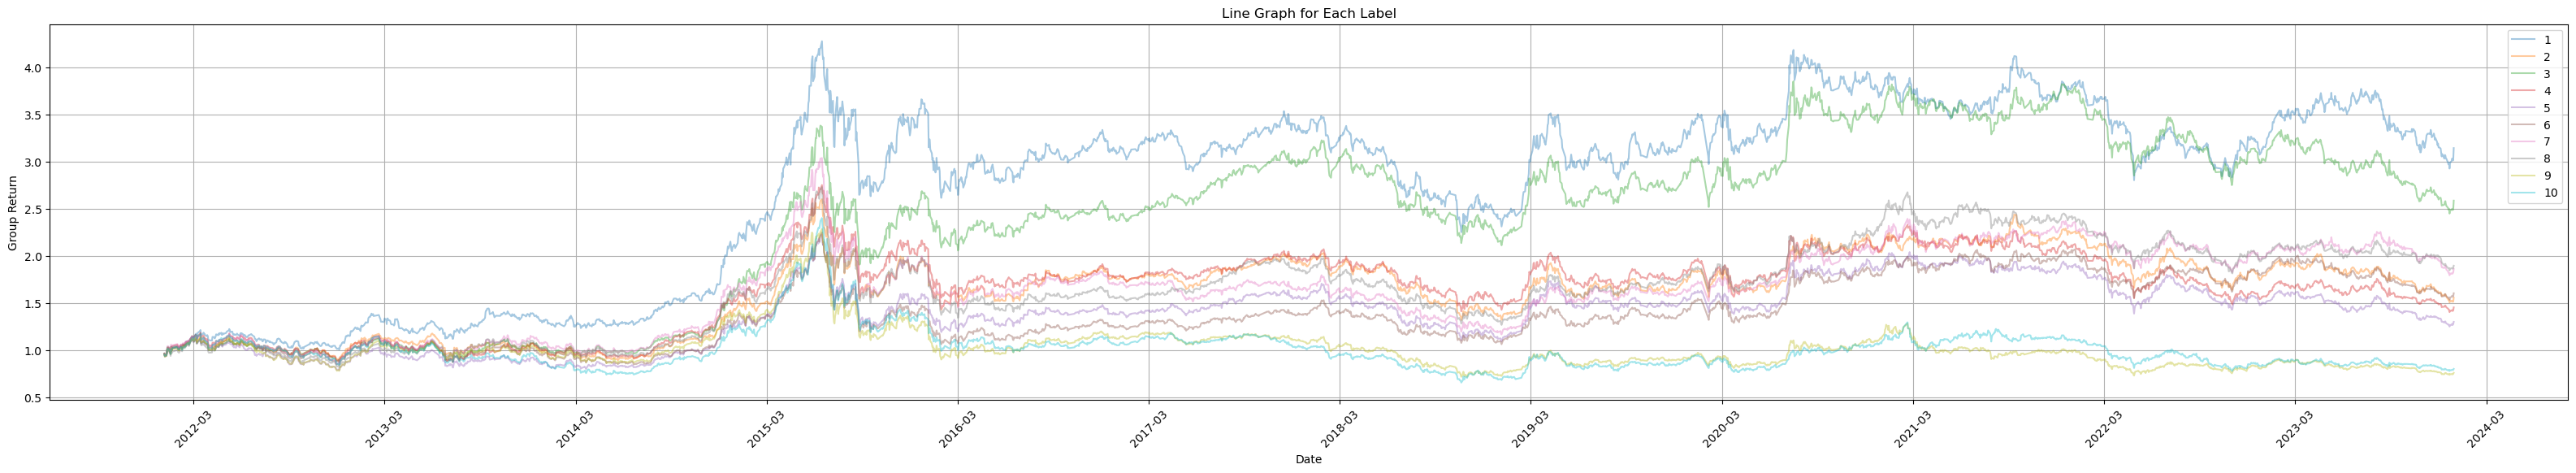

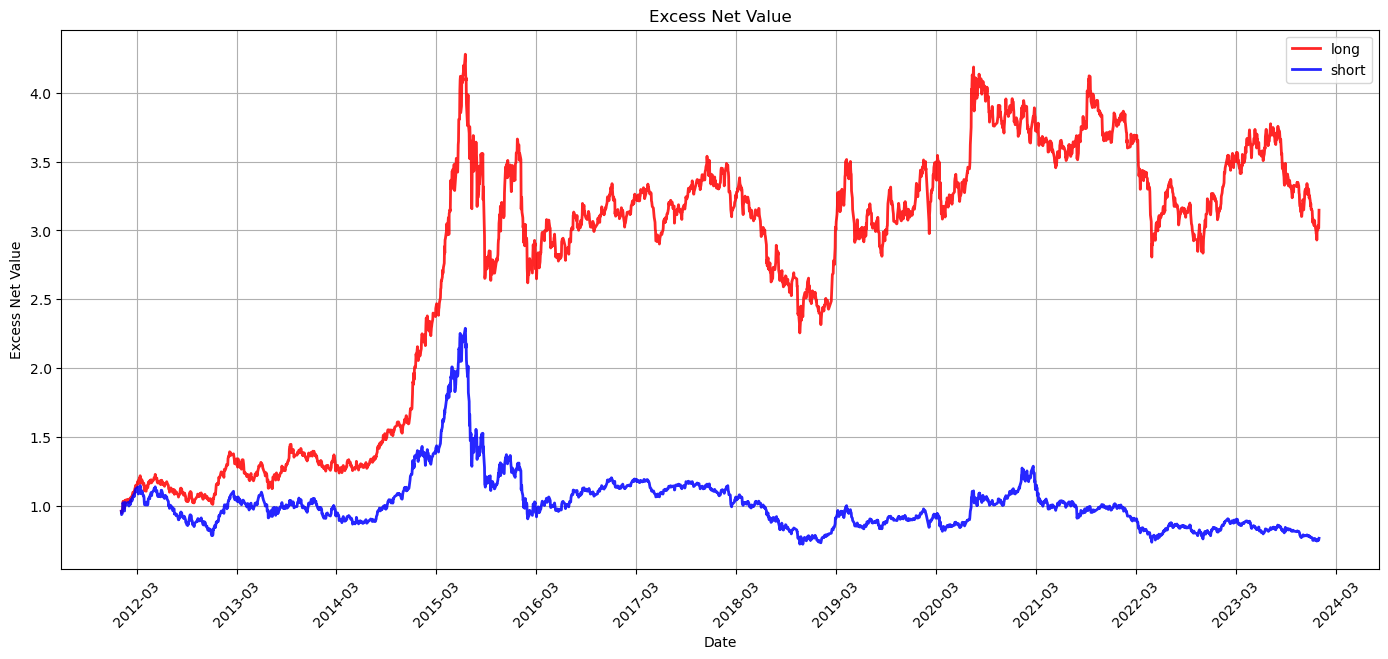

In [296]:
reg = func(regress) #研报方法

### 传统版本回归

In [297]:
traditional = pd.read_csv(os.path.join(root, 'ep_ratio_ttm_regress_result'),index_col=0)
#traditional = traditional.T
traditional = filter_stocks(traditional, idx)

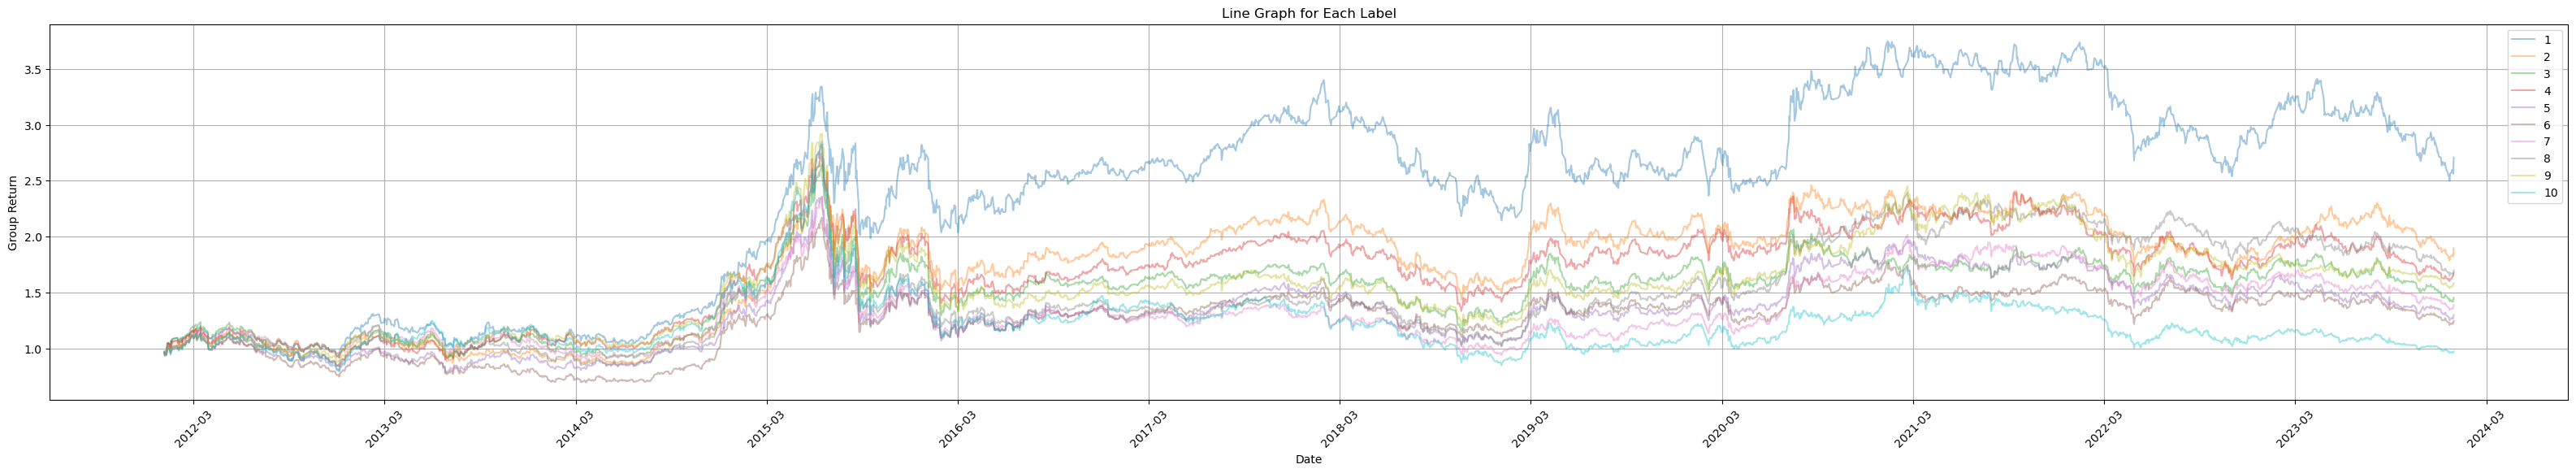

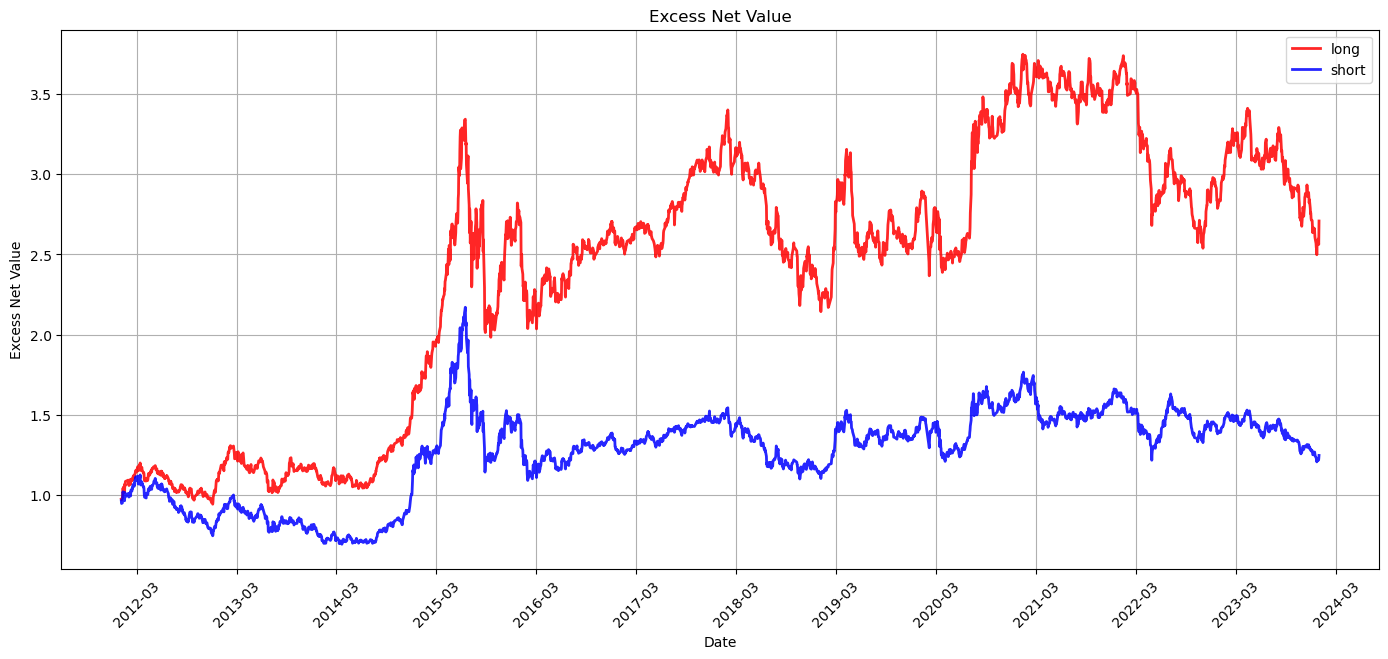

In [298]:
tra = func(traditional) #传统方法

### 对比两种的多头空头

In [299]:
regress_clean = func1(filter_stocks(regress.T, idx))

In [300]:
traditional_clean = func1(filter_stocks(traditional.T, idx))

In [301]:
benchmark = filter_stocks1(price, idx).pct_change().mean(axis=1).dropna()
benchmark = (1 + benchmark[benchmark.index <= '2024-01-01']).cumprod()

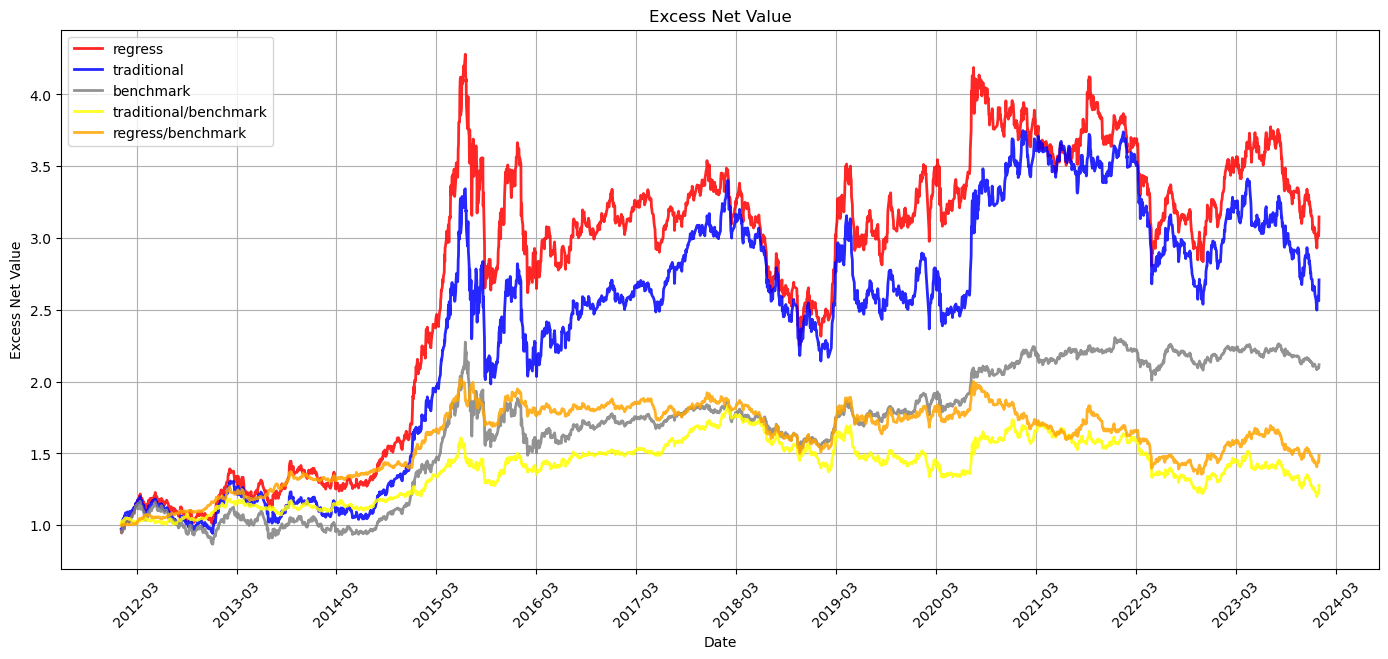

In [302]:
graph(regress_clean[1], traditional_clean[1], benchmark)

df1 = regress_clean
df2 = traditional_clean

fig, ax1 = plt.subplots(figsize=(17, 6))


df1.index = pd.to_datetime(df1.index)

ax1.plot(df1.index, df1, label='regress', color='r', linewidth=2, alpha = 0.85)
ax1.plot(df1.index, df2, label='traditional', color='b', linewidth=2, alpha = 0.85)
ax1.plot(df1.index, benchmark, label='benchmark', color='grey', linewidth=2, alpha = 0.85)
ax1.tick_params(axis='y', labelcolor='k')
ax2 = ax1.twinx()
ax2.plot(df1.index, df2/benchmark, label='traditional/benchmark', color='yellow', linewidth=2, alpha = 0.85)
ax2.plot(df1.index, df1.values/benchmark.values, label='regress/benchmark', color='orange', linewidth=2, alpha = 0.85)
ax2.tick_params(axis='y', labelcolor='k')
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')
plt.show()




In [303]:
ben = filter_stocks1(price,idx).pct_change().mean(axis=1).dropna().cumsum()
ben = ben[ben.index <= '2024-01-01']

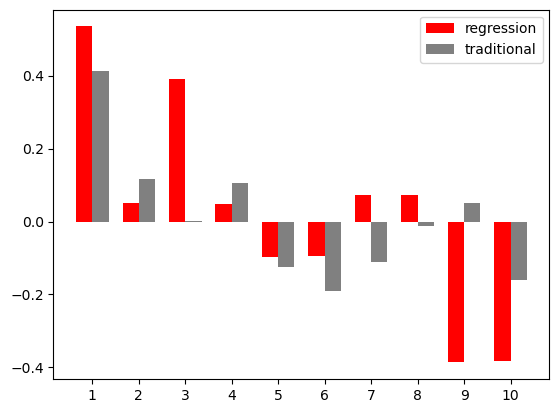

In [304]:
factor1 = reg.cumsum().apply(lambda x: x - ben.values)#reg.cumsum()
factor2 = tra.cumsum().apply(lambda x: x - ben.values)#tra.cumsum()


factor1_mean = factor1.mean()
factor2_mean = factor2.mean()

# 绘制图表
groups = range(1, 11)  # 十分组
width = 0.35  # 柱状图的宽度

fig, ax = plt.subplots()
bar1 = ax.bar(groups, factor1_mean, width, label='regression', color='red')
bar2 = ax.bar([p + width for p in groups], factor2_mean, width, label='traditional', color='grey')

# 添加标签和标题
ax.set_xticks([p + width/2 for p in groups])
ax.set_xticklabels(groups)
ax.legend()

# 显示图表
plt.show()

In [112]:
IC_series_regress = regress.corrwith(returns_df, axis=1, method="spearman").dropna()
IC_series_originla = traditional.corrwith(returns_df, axis=1, method="spearman").dropna()

In [113]:
IC_series_regress.mean()

-0.008527685618087144

In [114]:
IC_series_originla.mean()

-0.021140153278499708

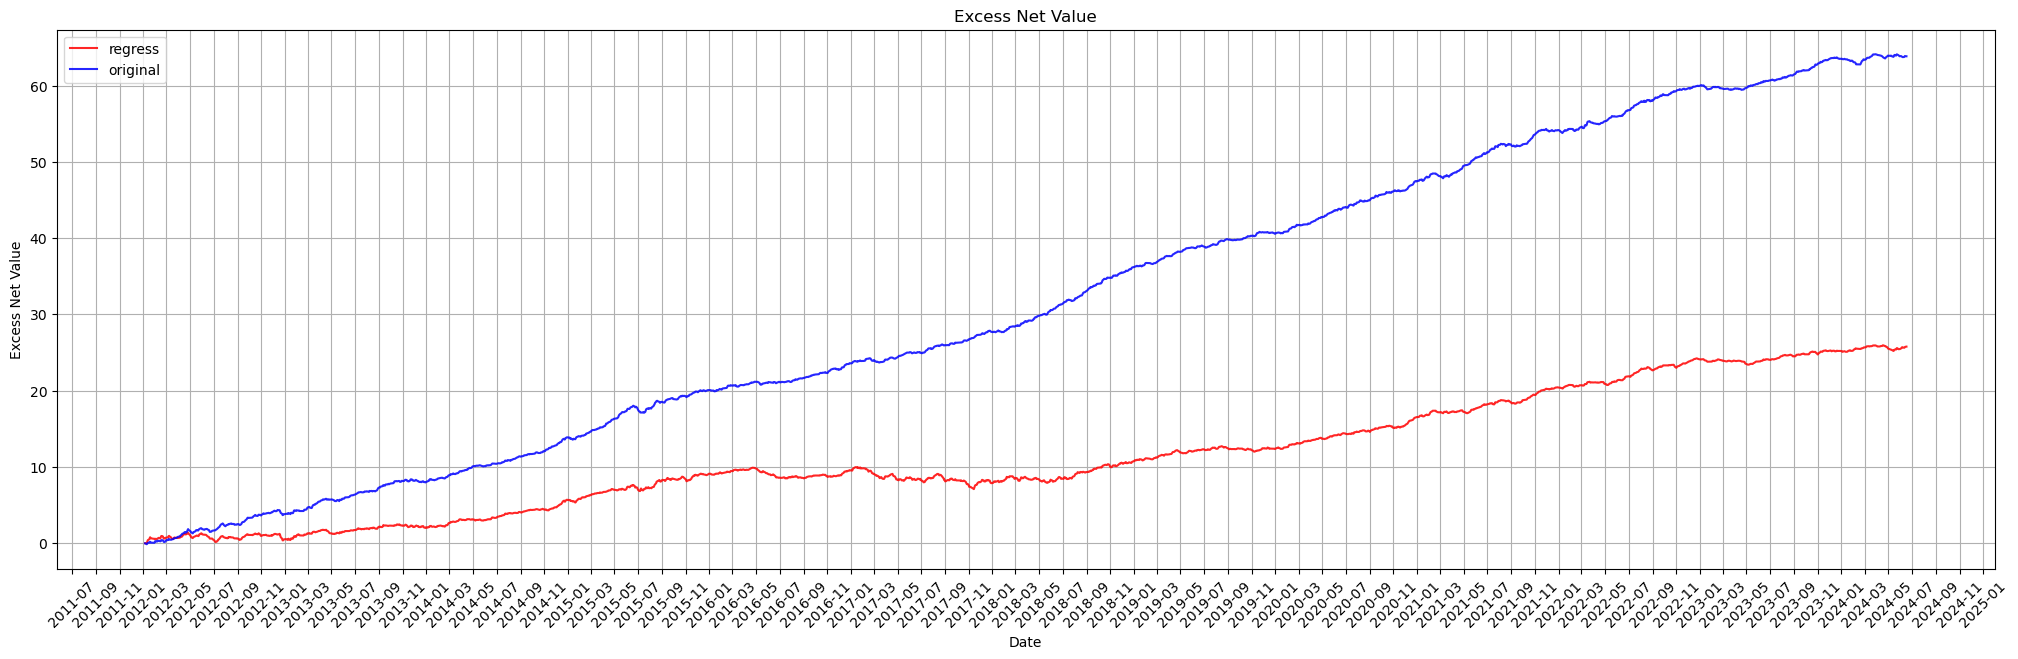

In [ ]:
plt.figure(figsize=(25, 7))
IC_series_originla.index = pd.to_datetime(IC_series_originla.index)
plt.plot(IC_series_originla.index, -IC_series_regress.cumsum(), label='regress', color='r', alpha = 0.85)
plt.plot(IC_series_originla.index, -IC_series_originla.cumsum(), label='original', color='b',alpha = 0.85)
    #plt.plot(all_average_returns_df.index, long_cumulative/short_cumulative, label='original version', color='orange',alpha = 0.85)#需要单独一个数轴
plt.xlabel('Date')
plt.ylabel('Excess Net Value')
plt.title('Excess Net Value')
    # 设置x轴标签的格式
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))  # 每隔一个月显示一次
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # 旋转x轴标签以便更好的显示
plt.show()

# 2.2 𝑙𝑛(𝑄𝑢𝑎𝑟𝑡_𝐸𝑡) = 𝛽 ⋅ ln(𝑎𝑏𝑠(𝑄𝑢𝑎𝑟𝑡_𝐸𝑡−4)) + 𝛼 + 𝜀

# 2.4 𝑙𝑛(𝑄𝑢𝑎𝑟𝑡_𝑆) = 𝛽 ⋅ 𝑙𝑛⁡(𝑀𝑉) + 𝛼 + 𝜀


# 2.8 𝑙𝑛(𝑇𝑇𝑀_𝑑𝑖𝑣) = 𝛽 ⋅ 𝑙𝑛⁡(𝑀𝑉) + 𝛼 + 𝜀

In [306]:
traditional = pd.read_csv(os.path.join(root, 'dividend_yield_ttm'),index_col=0)
#traditional = traditional.T
traditional = filter_stocks(traditional.T, idx)

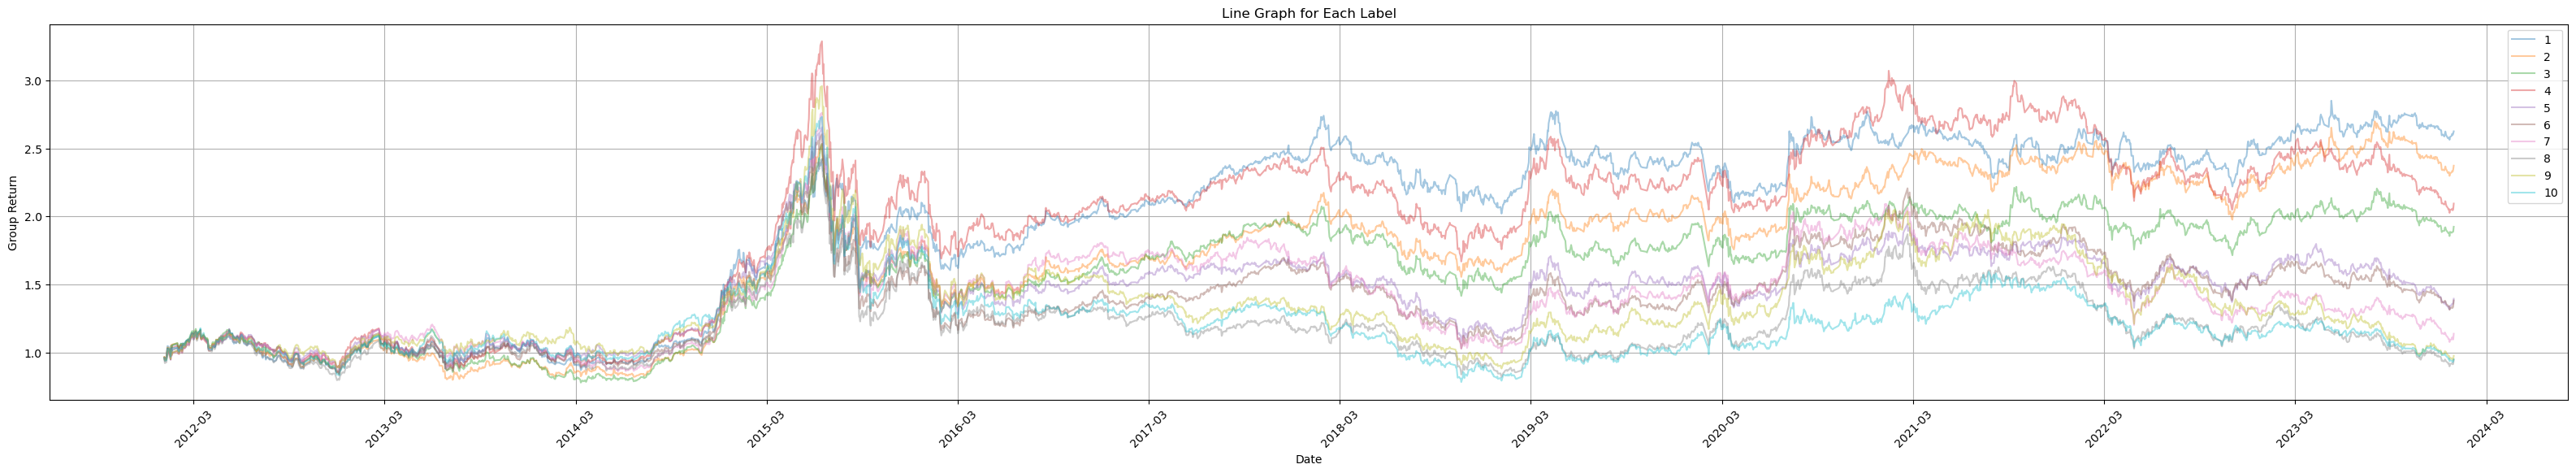

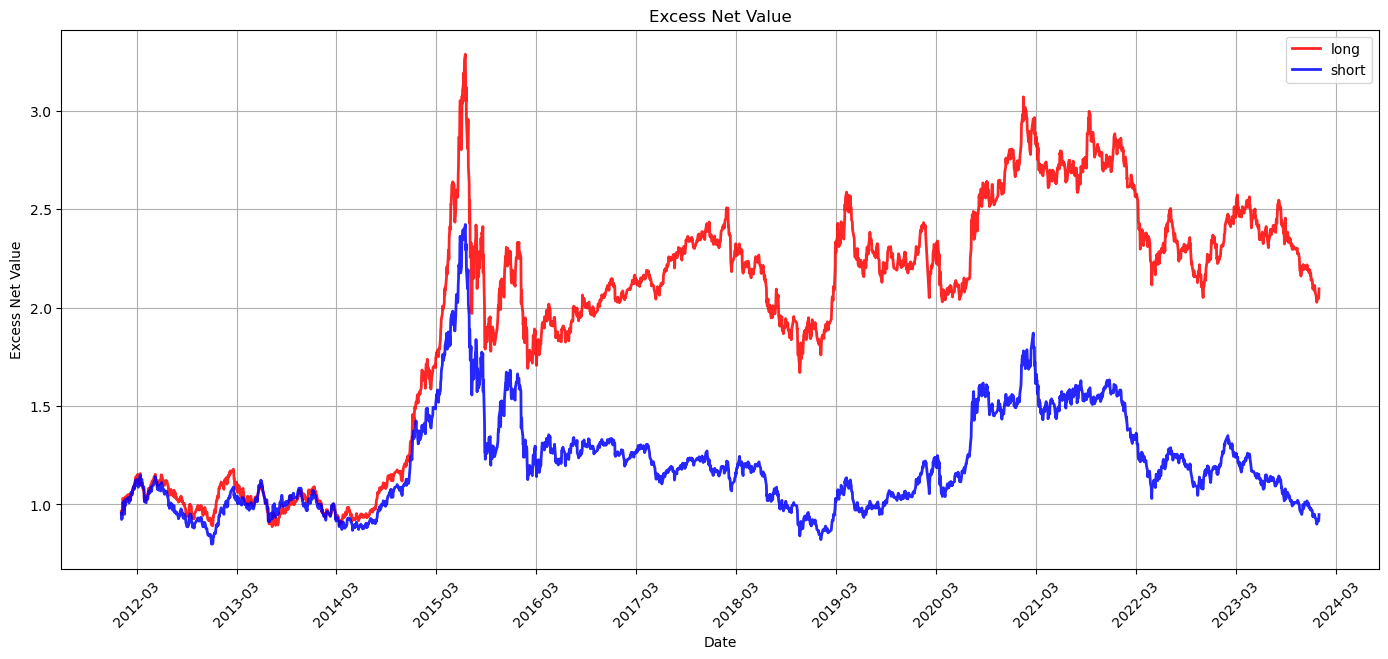

In [307]:
tra = func(traditional) #传统方法

In [ ]:
import cvxpy as cp
import numpy as np
import pandas as pd

# 假设我们有以下输入数据
# f: 因子暴露矩阵，shape为(n_stocks, n_factors)
# X: 股票价格因子风险暴露矩阵，shape为(n_stocks, n_factors)
# w_b: 基准组合的权重，shape为(n_stocks,)
# s_l, s_h: 因子暴露风险限制的下限和上限，shape为(n_factors,)
# h_l, h_h: 行业偏离度限制的下限和上限，shape为(n_industries,)
# w_l, w_h: 个股权重限制的下限和上限，shape为(n_stocks,)
# b_l, b_h: 成分股权重占比限制的下限和上限，shape为(n_stocks,)
# w_0: 上期持仓权重，shape为(n_stocks,)
# t_0h: 换手率上限

# 示例数据（请根据你的实际数据进行替换）
n_stocks = 100
n_factors = 10
n_industries = 5

f = np.random.randn(n_stocks, n_factors)
X = np.random.randn(n_stocks, n_factors)
w_b = np.random.rand(n_stocks)
s_l = np.random.rand(n_factors)
s_h = s_l + np.random.rand(n_factors)
h_l = np.random.rand(n_industries)
h_h = h_l + np.random.rand(n_industries)
w_l = np.zeros(n_stocks)
w_h = np.ones(n_stocks)
b_l = np.zeros(n_stocks)
b_h = np.ones(n_stocks)
w_0 = np.random.rand(n_stocks)
t_0h = 0.1

# 定义变量
w = cp.Variable(n_stocks)

# 目标函数：最大化单因子暴露 f.T @ w
objective = cp.Maximize(f.T @ w)

# 约束条件
constraints = [
    s_l <= X @ (w - w_b), X @ (w - w_b) <= s_h,
    h_l <= X @ (w - w_b), X @ (w - w_b) <= h_h,
    w_l <= w, w <= w_h,
    b_l <= w, w <= b_h,
    cp.sum(w) == 1,
    cp.norm(w - w_0, 1) <= t_0h
]

# 定义优化问题
problem = cp.Problem(objective, constraints)

# 求解优化问题
result = problem.solve()

# 输出结果
print("Optimal weights:", w.value)
